# N-Armed Bandit

Vamos a analizar en este cuaderno el comportamiento del compromiso entre exploración y explotación.
Para ello vamos a implementar un N-armed Bandit y estudiaremos diferentes estrategias de apuesta:
Una estrategia greedy
Dos estrategias epsilon-greedy

Visualizaremos los resultados de las gráficas de recompensa para ver su evolución



In [1]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline



#### Ejercicio 1.1:  
Completa el código con la línea en '??'

In [3]:
class eps_bandit:
    '''
    epsilon-greedy k-bandit problem
    
    Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    
    def __init__(self, k, eps, iters, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        
        #ESTA ES LA DEFINICION DE LA FUNCION Q(a) PARA CADA A (PARA CADA MAQUINA)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)    #<<<---------Ejercicio 1.5
  
  
    #EJECUTA UNA ACCION
  
    def pull(self):
        # Generate random number
        p = np.random.rand()
        
        #DEFINICION DE LAS POLITICAS
        #PARA LA POLITICA GREEDY, SE ELIJE EN LA PRIMERA ITERACION
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)
         
        #Calculo de la recompensa
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        #ESTA INSTRUCCION ES LA ACTUALIZACION DE  LA FUNCION Q(a)
        #USANDO LA FORMULA ITERATIVA DE CALCULAR LA MEDIA
        # Update results for a_k
        
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    #ESTA FUNCION EJECUTA LA ANTERIOR EL NUMERO DE ITERACIONES ESTABLECIDO
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

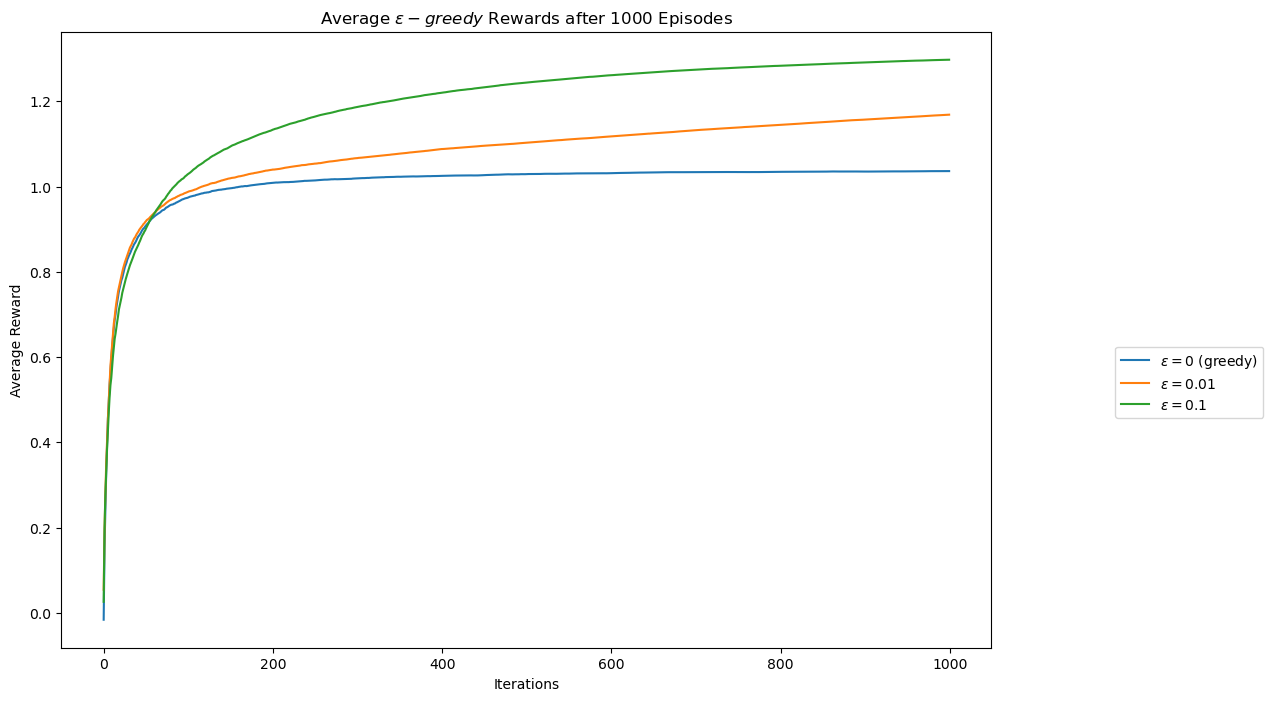

In [4]:
#VAMOS A HACER TRES EXPERIMENTOS: 
#1. Política Greedy
#2. Política Epsilon-Greedy con epsilon = 0.01
#3. Política epsilon-greedy con epsilon = 0.1
#LOS VALORES DE LAS MEDIAS SE ELIGEN ENTRE 0 y 1 CON UNA gausiana

k = 10
iters = 1000

#GENERAMOS ESTRUCTURAS PARA LOS TRES EXPERIMENTOS QUE VAMOS A HACER
#ESTAS VARIABLES ACUMULARAN LA MEDIA DE LA REWARD OBTENIDA EN CADA ITERACION
#ES DECIR eps_0_rewards[5] ACUMULA LA MEDIA DE LOS VALORES DE REWARD 
#EN LA ITERACION 5 CALCULADA SOBRE 1000 EJECUCIONES
#ESTOS VALORES SON LOS QUE SE REPRESENTAN EN LAS GRAFICAS
eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

#SE HACEN 1000 EJECUCIONES (episodes)  DE LOS EXPERIMENTOS 
#CON 1000 INTENTOS (ACCIONES) CADA UNO
episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters)
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    
    # Update long-term averages
    #Son vectores de longitud 'iters' que almacenan  el valor medio de cada iteracion para 1000 episodes
    #donde cada episode es un conjunto de 'iters' acciones
    #ES DECIR eps_0_rewards[5] ACUMULA LA MEDIA DE LOS VALORES DE REWARD 
    #EN LA ITERACION 5 CALCULADA SOBRE 1000 EJECUCIONES
    #ESTOS VALORES SON LOS QUE SE REPRESENTAN EN LAS GRAFICAS
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) 
    + " Episodes")
plt.show()

#### Ejercicio 1.2: 
Fíjate en la gráfica de epsilon =0. ¿por qué no es una línea horizontal desde el primer momento si siempre en un episodio tiene el mismo valor?. Responde a continuación en esta caja.

RESPUESTA: Realmente no tienen el mismo valor. Con epsilon 0 hemos elegido una máquina tragaperras concreta, pero que tiene su distribución de recompensas. Conforme vamos usándola, el valor que nos devuelve se aproxima a la media de la distribución, por eso al principio no tiene ese valor y luego sí que con elpaso de las iteraciones la media se estabiliza en su verdadero valor (aproximadamente).



#### Ejercicio 1.3: 
¿qué sería necesario que cambiara para que la politica epsilon =0.01 tuviese mejor resultado que la epsilon=0.1. Responde a continuación

RESPUESTA: Necesitaria más iteraciones. Posiblmente llegaría al menos igual que la de epsilon=0.1


In [ ]:
#AHORA LAS REWARDS MEDIAS DE CADA ACCION VAN DE 0 a 9 
#(0, para la accion 0, 1 para la  accion 1 etc.)
k = 10
iters = 1000

#ESTAS VARIABLES ACUMULARAN LA MEDIA DE LA REWARD OBTENIDA EN CADA ITERACION
#ES DECIR eps_0_rewards[5] ACUMULA LA MEDIA DE LOS VALORES DE REWARD 
#EN LA ITERACION 5 CALCULADA SOBRE 1000 EJECUCIONES
#ESTOS VALORES SON LOS QUE SE REPRESENTAN EN LAS GRAFICAS
eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)


eps_0_selection = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection = np.zeros(k)

#SE HACEN 1000 EJECUCIONES (episodes)  DE LOS EXPERIMENTOS 
#CON 1000 INTENTOS (ACCIONES) CADA UNO
episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters, mu='sequence')
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
    # Average actions per episode
    eps_0_selection = eps_0_selection + (
        eps_0.k_n - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (
        eps_01.k_n - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (
        eps_1.k_n - eps_1_selection) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.5,
              linestyle="--")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + 
     str(episodes) + " Episodes")
plt.show()

#### Ejercicio 1.4: 
¿En qué influyen el valor de las recompensas en la forma de las gráficas? ¿Por qué?

RESPUESTA: Las gráficas lógicamente son más altas ya que las recompensas también lo son. Por lo demás, las tendencias de las curvas son parecidas a las del ejercicio anterior.


#### Ejercicio 1.5:
Modifica el valor de las recompensas cambiando los argumentos de la función señalada en el código de la segunda caja de python (señalada con <<<-------Ejercicio 1.5) para tener unos valores más grandes de recompensas y vuelve a ejecutar el codigo para obtener otras gráficas en este apartado. ¿Cambia la situación? ¿Qué puedes concluir acerca del valor absoluto de las recompensas usadas? Responde a continuación:






#### Ejercicio 1.6 (tras ver la función Softmax en teoría):
Implementa la función de exploración Softmax. Experimenta con diferentes temperaturas (0.5,1,5,10,...) y observa las gráficas que salen. 
Compáralas con las obtenidas para epsilon-greedy. Escribe tus conclusiones a continuación

In [24]:
#Implementa aquí el problema con Softmax. Copia y pega del codigo anterior 
#todo salvo la implementación y uso de SoftMax.
#Implementacion con temperaturas 0.8 y 3
class eps_bandit_softmax:
    '''
    epsilon-greedy k-bandit problem
    
    Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    
    def __init__(self, k, temperatura, iters, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.temperatura = temperatura
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        #accion greedy (inicializamos a ninguna maquina)
        self.greedy = -1
        
        #ESTA ES LA DEFINICION DE LA FUNCION Q(a) PARA CADA A (PARA CADA MAQUINA)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)    #<<<---------Ejercicio 1.5
  
  
    #EJECUTA UNA ACCION
  
    def pull2(self):
        
        from scipy.special import softmax  #CARGAMOS SOFTMAX
        
            
        #======LA MODIFICACION PARA USAR SOFTMAX ESTA AQUI======
        
        if self.temperatura == 0 and self.n == 0:
            self.greedy = np.random.choice(self.k)
            a=self.greedy
        else:
            if self.temperatura != 0:
                #print(self.k_reward)
                #print(self.temperatura)
                probs = softmax(self.k_reward/self.temperatura)
            
                a = np.random.choice(self.k, p=probs)
            else:
                a = self.greedy
        #=======================================================
        
        #Calculo de la recompensa
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        #ESTA INSTRUCCION ES LA ACTUALIZACION DE  LA FUNCION Q(a)
        #USANDO LA FORMULA ITERATIVA DE CALCULAR LA MEDIA
        # Update results for a_k
        
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    #ESTA FUNCION EJECUTA LA ANTERIOR EL NUMERO DE ITERACIONES ESTABLECIDO
    def run(self):
        for i in range(self.iters):
            self.pull2()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)




episodio 0
episodio 1
episodio 2
episodio 3
episodio 4
episodio 5
episodio 6
episodio 7
episodio 8
episodio 9
episodio 10
episodio 11
episodio 12
episodio 13
episodio 14
episodio 15
episodio 16
episodio 17
episodio 18
episodio 19
episodio 20
episodio 21
episodio 22
episodio 23
episodio 24
episodio 25
episodio 26
episodio 27
episodio 28
episodio 29
episodio 30
episodio 31
episodio 32
episodio 33
episodio 34
episodio 35
episodio 36
episodio 37
episodio 38
episodio 39
episodio 40
episodio 41
episodio 42
episodio 43
episodio 44
episodio 45
episodio 46
episodio 47
episodio 48
episodio 49
episodio 50
episodio 51
episodio 52
episodio 53
episodio 54
episodio 55
episodio 56
episodio 57
episodio 58
episodio 59
episodio 60
episodio 61
episodio 62
episodio 63
episodio 64
episodio 65
episodio 66
episodio 67
episodio 68
episodio 69
episodio 70
episodio 71
episodio 72
episodio 73
episodio 74
episodio 75
episodio 76
episodio 77
episodio 78
episodio 79
episodio 80
episodio 81
episodio 82
episodio 83
ep

episodio 639
episodio 640
episodio 641
episodio 642
episodio 643
episodio 644
episodio 645
episodio 646
episodio 647
episodio 648
episodio 649
episodio 650
episodio 651
episodio 652
episodio 653
episodio 654
episodio 655
episodio 656
episodio 657
episodio 658
episodio 659
episodio 660
episodio 661
episodio 662
episodio 663
episodio 664
episodio 665
episodio 666
episodio 667
episodio 668
episodio 669
episodio 670
episodio 671
episodio 672
episodio 673
episodio 674
episodio 675
episodio 676
episodio 677
episodio 678
episodio 679
episodio 680
episodio 681
episodio 682
episodio 683
episodio 684
episodio 685
episodio 686
episodio 687
episodio 688
episodio 689
episodio 690
episodio 691
episodio 692
episodio 693
episodio 694
episodio 695
episodio 696
episodio 697
episodio 698
episodio 699
episodio 700
episodio 701
episodio 702
episodio 703
episodio 704
episodio 705
episodio 706
episodio 707
episodio 708
episodio 709
episodio 710
episodio 711
episodio 712
episodio 713
episodio 714
episodio 715

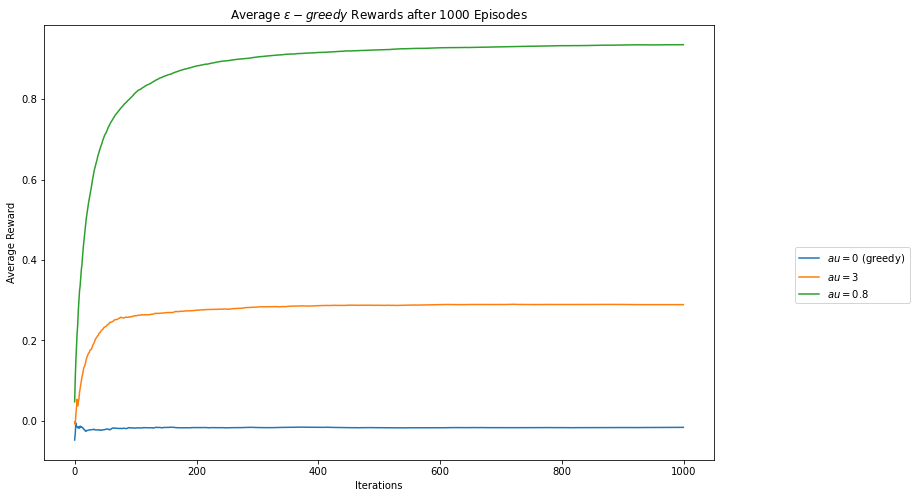

In [28]:
#VAMOS A HACER TRES EXPERIMENTOS: 
#1. Política Greedy
#2. Política softmax con temperatura 3
#3. Politica softmax con temperatura 0.8
#LOS VALORES DE LAS MEDIAS SE ELIGEN ENTRE 0 y 1 CON UNA gausiana

k = 10
iters = 1000

#GENERAMOS ESTRUCTURAS PARA LOS TRES EXPERIMENTOS QUE VAMOS A HACER
#ESTAS VARIABLES ACUMULARAN LA MEDIA DE LA REWARD OBTENIDA EN CADA ITERACION
#ES DECIR eps_0_rewards[5] ACUMULA LA MEDIA DE LOS VALORES DE REWARD 
#EN LA ITERACION 5 CALCULADA SOBRE 1000 EJECUCIONES
#ESTOS VALORES SON LOS QUE SE REPRESENTAN EN LAS GRAFICAS
eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

#SE HACEN 1000 EJECUCIONES (episodes)  DE LOS EXPERIMENTOS 
#CON 1000 INTENTOS (ACCIONES) CADA UNO
episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit_softmax(k, 0, iters)
    eps_01 = eps_bandit_softmax(k, 3, iters, eps_0.mu.copy())
    eps_1 = eps_bandit_softmax(k, 0.8, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    
    eps_01.run()
    
    eps_1.run()
    print("episodio", i)
    
    # Update long-term averages
    #Son vectores de longitud 'iters' que almacenan  el valor medio de cada iteracion para 1000 episodes
    #donde cada episode es un conjunto de 'iters' acciones
    #ES DECIR eps_0_rewards[5] ACUMULA LA MEDIA DE LOS VALORES DE REWARD 
    #EN LA ITERACION 5 CALCULADA SOBRE 1000 EJECUCIONES
    #ESTOS VALORES SON LOS QUE SE REPRESENTAN EN LAS GRAFICAS
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\tau = 0$ (greedy)")
plt.plot(eps_01_rewards, label="$\tau = 3$")
plt.plot(eps_1_rewards, label="$\tau = 0.8$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Softmax Rewards after " + str(episodes) 
    + " Episodes")
plt.show()